## Ne1

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Gpp = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m/LandSat_Gpp.csv')
ndvi = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m/LandSat_NDVI.csv')
Nppy = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m/LandSat_Nppy.csv')

In [4]:
Gpp.shape

(93058, 6)

In [5]:
Gpp.head()

,system:index,Date,GPP,latitude,longitude,.geo
0,0,2.015010e+11,3.0,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
1,1,2.015012e+11,22.0,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
2,2,2.015020e+11,18.0,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
3,3,2.015022e+11,5.0,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
4,4,2.015031e+11,138.0,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."


In [6]:
Gpp.isna().sum()

,0
system:index,0
Date,0
GPP,408
latitude,0
longitude,0
.geo,0


In [7]:
Gpp.dropna(inplace=True)

In [8]:
Gpp.drop(columns=['system:index'], inplace=True)
Gpp['GPP'] = Gpp['GPP'] * 0.0001
Gpp['Date'] = Gpp['Date'].astype(str)
Gpp['Date'] = Gpp['Date'].str[:8]
Gpp['Date'] = Gpp['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Gpp['Date'] = pd.to_datetime(Gpp['Date'], format='%Y%m%d', errors='coerce')
Gpp.head()

,Date,GPP,latitude,longitude,.geo
0,2015-01-01,0.0003,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
1,2015-01-16,0.0022,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
2,2015-02-01,0.0018,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
3,2015-02-17,0.0005,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
4,2015-03-06,0.0138,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."


In [9]:
Gpp['Year'] = Gpp['Date'].dt.year

In [10]:
Gpp.head()

,Date,GPP,latitude,longitude,.geo,Year
0,2015-01-01,0.0003,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015
1,2015-01-16,0.0022,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015
2,2015-02-01,0.0018,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015
3,2015-02-17,0.0005,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015
4,2015-03-06,0.0138,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015


In [11]:
Gppy = pd.DataFrame(Gpp.groupby(['Year','latitude','longitude'])['GPP'].sum()).reset_index()

In [12]:
Gppy.head()

,Year,latitude,longitude,GPP
0,2015,41.162468,-96.475962,1.6393
1,2015,41.162468,-96.475693,1.6312
2,2015,41.162468,-96.475423,1.6098
3,2015,41.162468,-96.475154,1.5860
4,2015,41.162468,-96.474884,1.5575


In [13]:
Gppy.rename(columns={'GPP': 'Gppy'}, inplace=True)

In [14]:
Gppy.shape

(4030, 4)

In [15]:
Gpp_merged = pd.merge(Gpp, Gppy, on=['Year', 'latitude','longitude'], how='inner')
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Year,Gppy
0,2015-01-01,0.0003,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015,1.6393
1,2015-01-16,0.0022,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015,1.6393
2,2015-02-01,0.0018,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015,1.6393
3,2015-02-17,0.0005,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015,1.6393
4,2015-03-06,0.0138,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",2015,1.6393


In [16]:
Gpp_merged.shape

(92650, 7)

In [17]:
Gpp_merged.drop(columns=['Year'],inplace=True)

In [18]:
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Gppy
0,2015-01-01,0.0003,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393
1,2015-01-16,0.0022,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393
2,2015-02-01,0.0018,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393
3,2015-02-17,0.0005,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393
4,2015-03-06,0.0138,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393


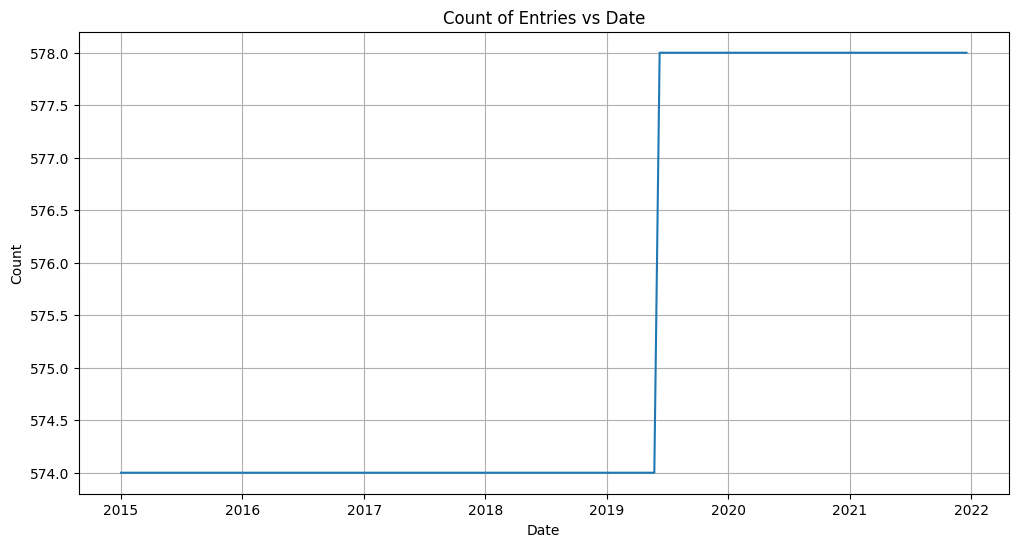

In [19]:
# Group by date and count the number of entries
date_counts = Gpp_merged.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date')
plt.grid(True)
plt.show()


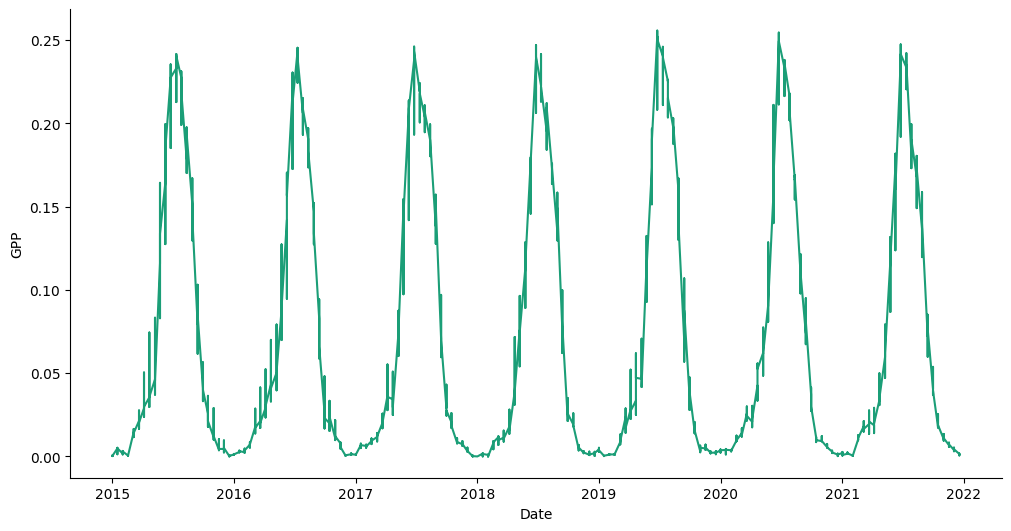

In [20]:
# @title Date vs GPP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('Dark2')
  xs = series['Date']
  ys = series['GPP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gpp_merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GPP')

In [21]:
unique_date_lat_lon = Gpp_merged[['latitude', 'longitude']].drop_duplicates()
print(unique_date_lat_lon)

        latitude  longitude
0      41.162468 -96.475962
161    41.162468 -96.475693
322    41.162468 -96.475423
483    41.162468 -96.475154
644    41.162468 -96.474884
...          ...        ...
91845  41.168397 -96.476501
92006  41.168397 -96.476232
92167  41.168397 -96.475962
92328  41.168667 -96.476771
92489  41.168667 -96.476501

[578 rows x 2 columns]


In [22]:
ndvi.head()

,system:index,Date,NDVI,latitude,longitude,.geo
0,0,2.015010e+11,NaN,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
1,1,2.015011e+11,0.223579,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
2,2,2.015012e+11,NaN,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
3,3,2.015012e+11,NaN,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
4,4,2.015020e+11,NaN,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."


In [23]:
ndvi.shape

(186116, 6)

In [24]:
ndvi.isna().sum()

,0
system:index,0
Date,0
NDVI,140496
latitude,0
longitude,0
.geo,0


In [25]:
ndvi.dropna(inplace=True)

In [26]:
ndvi.drop(columns=['system:index'], inplace=True)
ndvi['NDVI'] = ndvi['NDVI']
ndvi['Date'] = ndvi['Date'].astype(str)
ndvi['Date'] = ndvi['Date'].str[:8]
ndvi['Date'] = ndvi['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
ndvi['Date'] = pd.to_datetime(ndvi['Date'], format='%Y%m%d', errors='coerce')
ndvi.head()

,Date,NDVI,latitude,longitude,.geo
1,2015-01-09,0.223579,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
7,2015-02-26,0.211296,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
8,2015-03-06,0.156956,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
9,2015-03-14,0.219987,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
12,2015-04-06,0.182539,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."


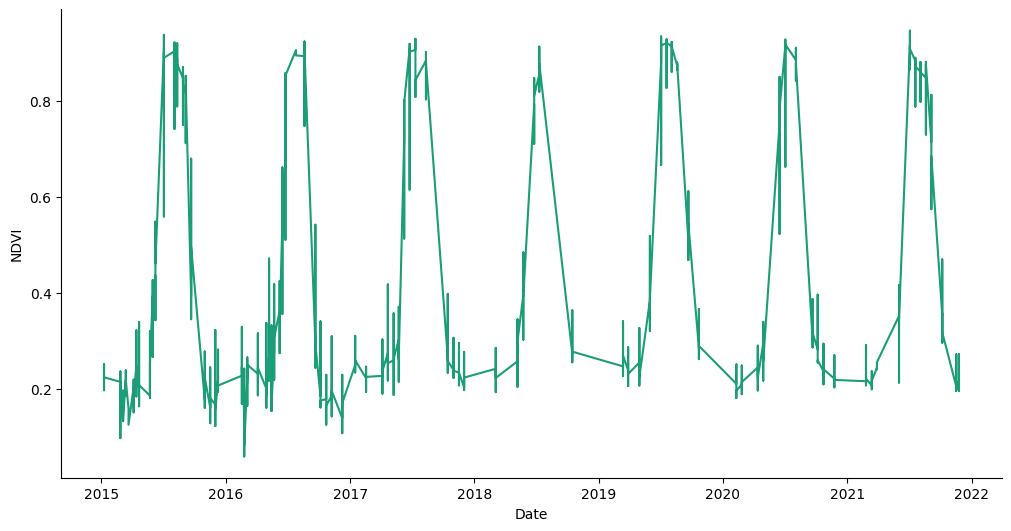

In [ ]:
# @title Date vs NDVI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('Dark2')
  xs = series['Date']
  ys = series['NDVI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ndvi.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NDVI')

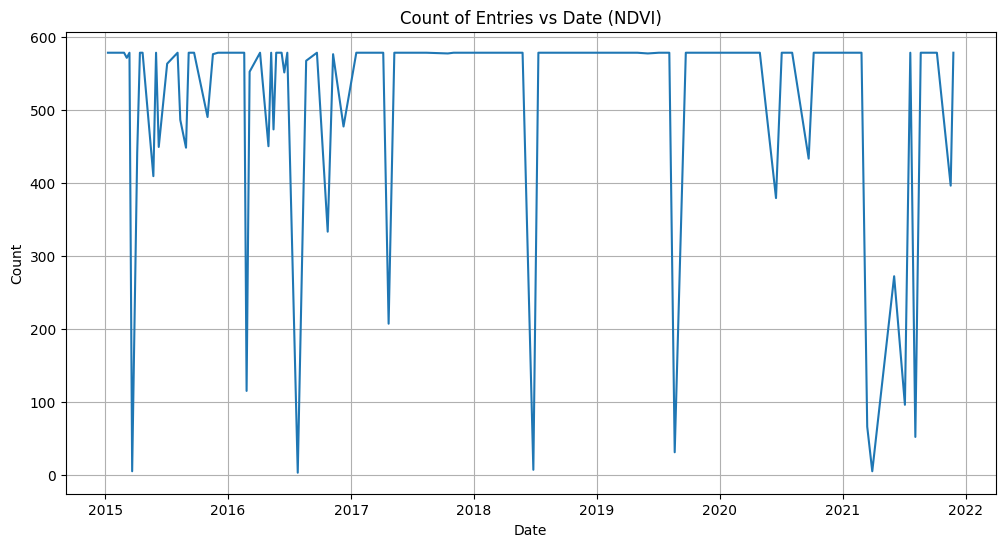

In [ ]:
# Group by date and count the number of entries
date_counts_ndvi = ndvi.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts_ndvi.index, date_counts_ndvi.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date (NDVI)')
plt.grid(True)
plt.show()


In [ ]:
ndvi.drop(columns=['.geo'],inplace=True)

KeyError: "['.geo'] not found in axis"

In [ ]:
#merge Gpp and NDVI on Date, latitude and longitude

merged_df = pd.merge(Gpp_merged, ndvi, on=['Date', 'latitude', 'longitude'], how='inner')
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI
0,2015-03-06,0.0138,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.156956
1,2015-04-06,0.0282,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.182539
2,2015-04-22,0.0361,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.223733
3,2015-06-09,0.1717,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.482811
4,2015-08-12,0.1944,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.903902


In [ ]:
merged_df.shape

(19934, 7)

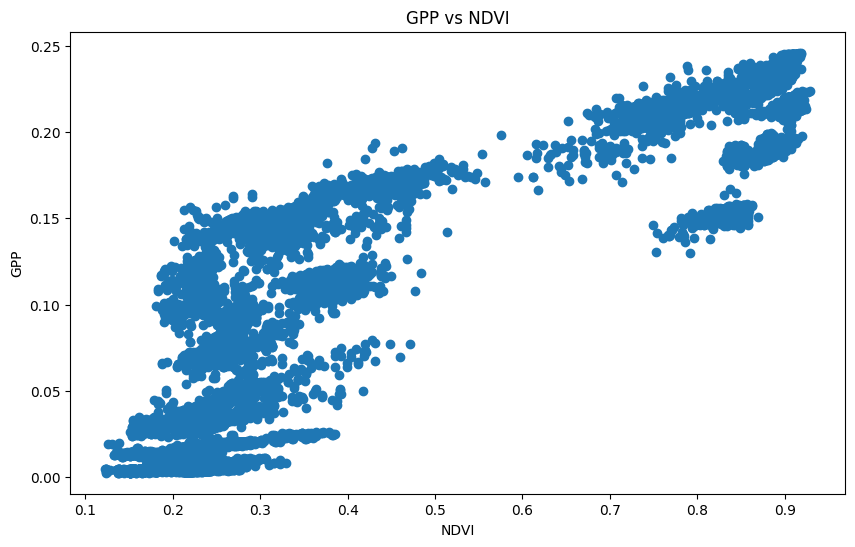

In [ ]:
# @title GPP vs NDVI

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['NDVI'], merged_df['GPP'])
plt.xlabel('NDVI')
plt.ylabel('GPP')
_ = plt.title('GPP vs NDVI')


In [ ]:
Nppy.shape

(3452, 5)

In [ ]:
Nppy.isna().sum()

,0
Date,0
NPPy,0
latitude,0
longitude,0
.geo,0


In [ ]:
Nppy.dropna(inplace=True)

In [ ]:
Nppy.head()

,Date,NPPy,latitude,longitude,.geo
0,2015-01-01,0.8330,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
1,2016-01-01,0.7773,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
2,2017-01-01,0.8404,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
3,2018-01-01,0.7778,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."
4,2019-01-01,0.8606,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670..."


In [ ]:
Nppy.drop(columns=['system:index'], inplace=True)
Nppy['NPPy'] = Nppy['NPPy']*0.0001
Nppy['Date'] = Nppy['Date'].astype(str)
Nppy['Date'] = Nppy['Date'].str[:8]
Nppy['Date'] = Nppy['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Nppy['Date'] = pd.to_datetime(Nppy['Date'], format='%Y%m%d', errors='coerce')
Nppy.head()

KeyError: "['system:index'] not found in axis"

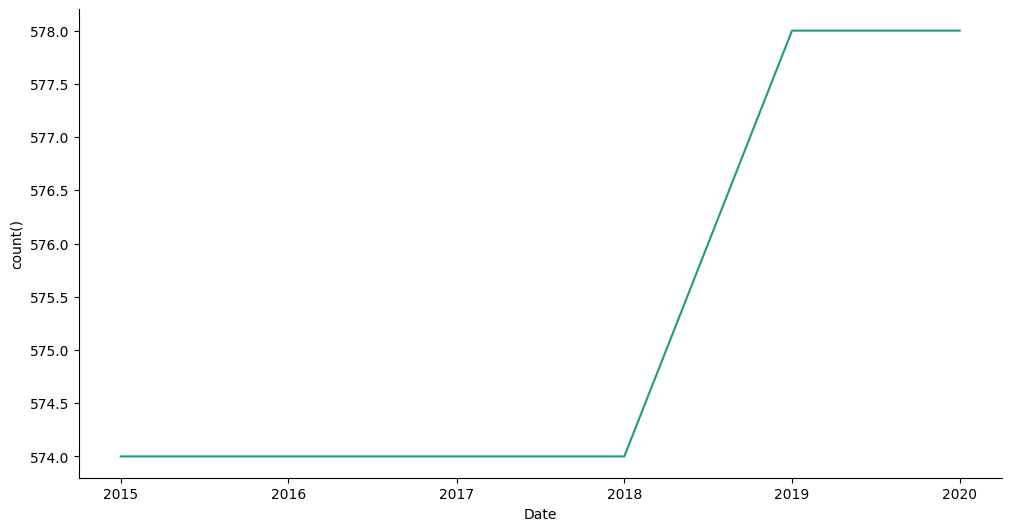

In [ ]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

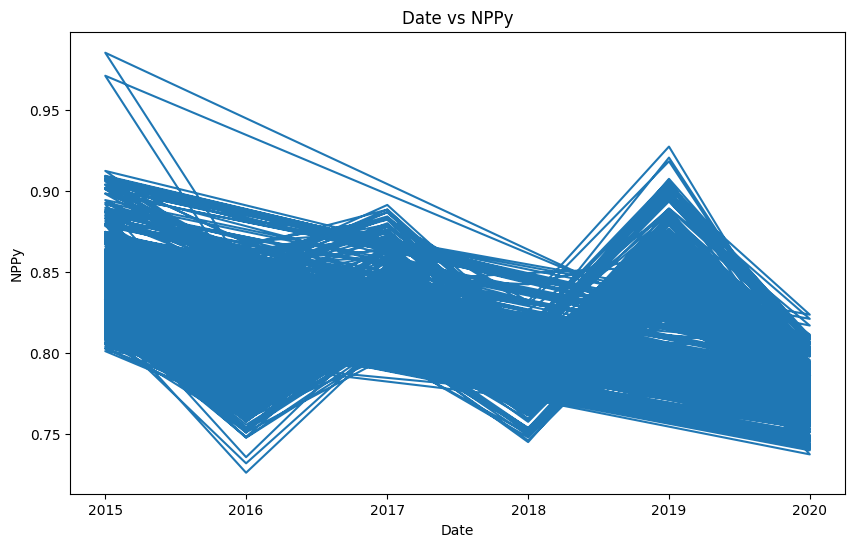

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Nppy['Date'], Nppy['NPPy'])
plt.xlabel('Date')
plt.ylabel('NPPy')
plt.title('Date vs NPPy')
plt.show()

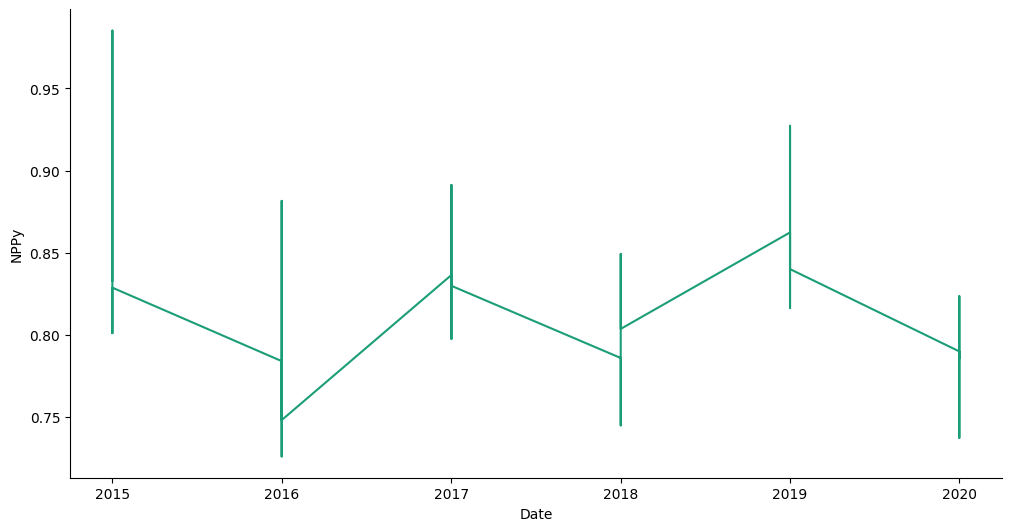

In [ ]:
# @title Date vs NPPy

def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('Dark2')
  xs = series['Date']
  ys = series['NPPy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NPPy')


In [ ]:
Nppy.drop(columns=['.geo'], inplace=True)

In [ ]:
# Extract year from the 'Date' column and create a new 'year' column
Nppy['year'] = Nppy['Date'].dt.year


In [ ]:
Nppy.head()

,Date,NPPy,latitude,longitude,year
0,2015-01-01,0.8330,41.162468,-96.475962,2015
1,2016-01-01,0.7773,41.162468,-96.475962,2016
2,2017-01-01,0.8404,41.162468,-96.475962,2017
3,2018-01-01,0.7778,41.162468,-96.475962,2018
4,2019-01-01,0.8606,41.162468,-96.475962,2019


In [ ]:
Nppy.drop(columns=['Date'], inplace=True)

In [ ]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year
0,2015-03-06,0.0138,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.156956,2015
1,2015-04-06,0.0282,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.182539,2015
2,2015-04-22,0.0361,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.223733,2015
3,2015-06-09,0.1717,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.482811,2015
4,2015-08-12,0.1944,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.903902,2015


In [ ]:
merged_data = pd.merge(merged_df, Nppy, on=['year', 'latitude', 'longitude'], how='inner')
merged_data.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year,NPPy
0,2015-03-06,0.0138,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.156956,2015,0.833
1,2015-04-06,0.0282,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.182539,2015,0.833
2,2015-04-22,0.0361,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.223733,2015,0.833
3,2015-06-09,0.1717,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.482811,2015,0.833
4,2015-08-12,0.1944,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",1.6393,0.903902,2015,0.833


In [ ]:
# Rearrange the columns in the desired order
new_column_order = ['Date', 'latitude', 'longitude', '.geo', 'GPP', 'NDVI', 'Gppy', 'NPPy']
merged_data = merged_data[new_column_order]

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-03-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0138,0.156956,1.6393,0.833
1,2015-04-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0282,0.182539,1.6393,0.833
2,2015-04-22,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0361,0.223733,1.6393,0.833
3,2015-06-09,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.1717,0.482811,1.6393,0.833
4,2015-08-12,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.1944,0.903902,1.6393,0.833


In [ ]:
merged_data.shape

(19538, 8)

In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0


In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-03-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0138,0.156956,1.6393,0.833
1,2015-04-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0282,0.182539,1.6393,0.833
2,2015-04-22,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0361,0.223733,1.6393,0.833
3,2015-06-09,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.1717,0.482811,1.6393,0.833
4,2015-08-12,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.1944,0.903902,1.6393,0.833


In [ ]:
merged_data['Npp'] = (merged_data['GPP'] / merged_data['Gppy']) * merged_data['NPPy']

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp
0,2015-03-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0138,0.156956,1.6393,0.833,0.007012
1,2015-04-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0282,0.182539,1.6393,0.833,0.014330
2,2015-04-22,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0361,0.223733,1.6393,0.833,0.018344
3,2015-06-09,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.1717,0.482811,1.6393,0.833,0.087248
4,2015-08-12,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.1944,0.903902,1.6393,0.833,0.098783


In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0


In [ ]:
merged_data.shape

(19538, 9)

In [ ]:
# Export the dataframe to a CSV file
merged_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m/Nebreska_maize_satellite_data.csv', index=False)


# Weather data from Flux towers

In [ ]:
arm_data = pd.read_csv('/content/drive/Shareddrives/DATA298B/Ameriflux data/Nebraska/US-Ne1.csv', skiprows=2)
arm_data

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,...,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD
0,200101010000,200101010100,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
1,200101010100,200101010200,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
2,200101010200,200101010300,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
3,200101010300,200101010400,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
4,200101010400,200101010500,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204499,202404301900,202404302000,1.76,0.3,0.3,0.529,170.0,-9999.0,-140.9,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
204500,202404302000,202404302100,1.37,0.1,0.1,0.430,10.0,-9999.0,-52.8,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
204501,202404302100,202404302200,0.34,0.3,0.3,0.077,-5.9,-9999.0,-12.8,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
204502,202404302200,202404302300,1.21,0.6,0.6,0.131,-2.2,-9999.0,-8.6,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0


In [ ]:
arm_data=arm_data.drop('TIMESTAMP_START',axis=1)

arm_data=arm_data.rename(columns={'TIMESTAMP_END': 'TIMESTAMP'})
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'], format='%Y%m%d%H%M')
arm_data = arm_data[(arm_data['TIMESTAMP'].dt.year >= 2015) & (arm_data['TIMESTAMP'].dt.year <= 2021)]
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date
data = arm_data

<ipython-input-60-2cc50464675b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
<ipython-input-60-2cc50464675b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date


In [ ]:
# Define the column range to check (excluding the Date column)
cols_to_check = data.columns[2:]  # This excludes the Date column

# Use apply with a lambda function to check if all values from Col1 to Col149 are -9999.0
rows_to_keep = data[cols_to_check].apply(lambda row: not (row == -9999.0).all(), axis=1)

# Filter the DataFrame to retain rows where not all values are -9999.0
data= data[rows_to_keep]
data

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,G_PI_F_1_1_1,...,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD
122711,2015-01-01,0.42,0.0,0.0,0.198,4.2,4.2,-21.0,-21.0,-35.6,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122712,2015-01-01,0.49,0.0,0.0,0.122,1.9,-9999.0,-22.0,-9999.0,-31.5,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122713,2015-01-01,0.23,0.0,0.0,0.222,3.6,-9999.0,-14.3,-9999.0,-31.7,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122714,2015-01-01,2.29,0.0,0.0,-9999.000,-3.9,-9999.0,-64.3,-9999.0,-26.9,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122715,2015-01-01,0.70,0.0,0.0,0.037,-1.5,-9999.0,-26.3,-9999.0,-20.9,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,-0.17,0.0,0.0,0.477,-9999.0,-9999.0,13.0,-9999.0,-17.8,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
184075,2021-12-31,0.91,0.1,0.1,0.555,-9999.0,-9999.0,12.7,-9999.0,-21.4,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
184076,2021-12-31,0.40,0.1,0.1,0.557,-9999.0,-9999.0,15.7,-9999.0,-24.5,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
184077,2021-12-31,0.52,0.0,0.0,0.589,-9999.0,-9999.0,34.1,-9999.0,-26.9,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0


In [ ]:
# Function to rename columns by replacing '_IN_' with 'IN' and '_OUT_' with 'OUT'
def rename_in_out_columns(col_name):
    if '_IN_' in col_name:
        return col_name.replace('_IN_', 'IN_')
    elif '_OUT_' in col_name:
        return col_name.replace('_OUT_', 'OUT_')
    else:
        return col_name

# Apply the function to all columns
data.columns = [rename_in_out_columns(col) for col in arm_data.columns]

# Display the first few rows to check the results
data.head()

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,G_PI_F_1_1_1,...,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD
122711,2015-01-01,0.42,0.0,0.0,0.198,4.2,4.2,-21.0,-21.0,-35.6,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122712,2015-01-01,0.49,0.0,0.0,0.122,1.9,-9999.0,-22.0,-9999.0,-31.5,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122713,2015-01-01,0.23,0.0,0.0,0.222,3.6,-9999.0,-14.3,-9999.0,-31.7,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122714,2015-01-01,2.29,0.0,0.0,-9999.000,-3.9,-9999.0,-64.3,-9999.0,-26.9,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122715,2015-01-01,0.70,0.0,0.0,0.037,-1.5,-9999.0,-26.3,-9999.0,-20.9,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0


In [ ]:
# Replace -9999.0 with NaN
data.replace(-9999.0, np.nan, inplace=True)

# Count missing values (NaNs) in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
missing_values_percent = (missing_values_count / len(data)) * 100

# Drop columns where missing values exceed 50%
data = data.drop(columns=missing_values_percent[missing_values_percent > 40].index)

# Ensure pandas shows all columns
pd.set_option('display.max_columns', None)
data

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,H_1_1_1,G_PI_F_1_1_1,CO2_PI_F_1_1_1,CO2_PI_F_1_2_1,CO2_PI_F_1_3_1,CO2_PI_F_1_4_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_PI_F_1_1_1,TA_PI_F_1_2_1,TA_PI_F_1_3_1,TA_PI_F_1_4_1,RH_PI_F_1_1_1,RH_PI_F_1_2_1,RH_PI_F_1_3_1,RH_PI_F_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,P_PI_F_1_1_1,P_PI_F_2_2_1,TS_PI_F_1_1_1,TS_PI_F_1_2_1,TS_PI_F_1_3_1,TS_PI_F_1_4_1,TS_PI_F_2_1_1,TS_PI_F_2_2_1,TS_PI_F_2_3_1,TS_PI_F_2_4_1,TS_PI_F_2_6_1,TS_PI_F_2_8_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_6_1,TS_2_8_1,PPFDIN_PI_F_1_1_1,PPFDOUT_PI_F_1_1_1,SWIN_PI_F_1_1_1,SWOUT_PI_F_1_1_1,NETRAD_PI_F_1_1_1,PPFD_DIF_PI_F_1_1_1,PPFD_DIR_PI_F_1_1_1,LWIN_PI_F_1_1_1,LWOUT_PI_F_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,NETRAD_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,WD_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_PI_F_1_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,SWC_PI_F_1_1_1,SWC_PI_F_1_2_1,SWC_PI_F_1_3_1,SWC_PI_F_1_4_1,SWC_PI_F_2_1_1,SWC_PI_F_2_2_1,SWC_PI_F_2_3_1,SWC_PI_F_2_4_1,SWC_PI_F_3_1_1,SWC_PI_F_3_2_1,SWC_PI_F_3_3_1,SWC_PI_F_3_4_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1
122711,2015-01-01,0.42,0.0,0.0,0.198,4.2,-21.0,-35.6,412.79,412.82,412.93,413.02,412.79,412.82,412.93,413.02,-12.69,-12.64,-12.57,-13.77,77.4,76.9,75.0,93.9,-12.69,-12.64,-12.57,-13.77,77.4,76.9,75.0,93.9,0.0,0.0,-6.20,-5.37,-3.68,-1.53,-10.76,-6.97,-6.18,-3.89,NaN,2.35,-6.20,-5.37,-3.68,-1.53,-10.76,-6.97,-6.18,-3.89,NaN,2.35,0.0,0.0,-1.7,1.1,-57.5,-0.4,0.1,195.0,249.8,-1.7,1.1,-57.5,195.0,249.8,258,3.81,3.35,3.35,98.14,98.14,0.091,0.40,11.4,31.1,39.1,45.6,7.8,24.4,30.3,43.0,9.4,35.5,28.9,42.0,11.4,31.1,39.1,45.6,7.8,24.4,30.3,43.0,9.4,35.5,28.9,42.0
122712,2015-01-01,0.49,0.0,0.0,0.122,1.9,-22.0,-31.5,413.64,413.66,413.79,413.97,413.64,413.66,413.79,413.97,-12.89,-12.82,-12.86,-14.13,78.4,77.6,76.0,95.5,-12.89,-12.82,-12.86,-14.13,78.4,77.6,76.0,95.5,0.0,0.0,-6.39,-5.55,-3.83,-1.60,-10.68,-7.15,-6.37,-4.05,NaN,2.33,-6.39,-5.55,-3.83,-1.60,-10.68,-7.15,-6.37,-4.05,NaN,2.33,0.0,0.0,0.0,0.0,-51.7,0.3,0.1,196.9,248.6,0.0,0.0,-51.7,196.9,248.6,237,2.75,2.45,2.57,98.04,98.04,0.242,0.50,11.4,31.0,39.0,45.6,7.8,24.1,30.3,42.9,9.4,35.4,28.9,42.0,11.4,31.0,39.0,45.6,7.8,24.1,30.3,42.9,9.4,35.4,28.9,42.0
122713,2015-01-01,0.23,0.0,0.0,0.222,3.6,-14.3,-31.7,414.22,414.19,414.31,414.45,414.22,414.19,414.31,414.45,-12.91,-12.77,-12.76,-13.99,78.7,77.6,76.0,95.2,-12.91,-12.77,-12.76,-13.99,78.7,77.6,76.0,95.2,0.0,0.0,-6.53,-5.69,-3.95,-1.68,-10.97,-7.30,-6.53,-4.19,NaN,2.31,-6.53,-5.69,-3.95,-1.68,-10.97,-7.30,-6.53,-4.19,NaN,2.31,0.0,0.0,0.0,0.0,-52.0,0.2,0.1,197.5,249.4,0.0,0.0,-52.0,197.5,249.4,233,3.79,3.39,3.48,97.98,97.98,0.045,0.30,11.4,30.9,39.0,45.6,7.8,23.7,30.3,43.0,9.4,35.2,28.9,42.0,11.4,30.9,39.0,45.6,7.8,23.7,30.3,43.0,9.4,35.2,28.9,42.0
122714,2015-01-01,2.29,0.0,0.0,NaN,-3.9,-64.3,-26.9,414.50,414.58,414.62,414.75,414.50,414.58,414.62,414.75,-12.55,-12.47,-12.41,-13.65,79.3,78.5,76.5,95.5,-12.55,-12.47,-12.41,-13.65,79.3,78.5,76.5,95.5,0.0,0.0,-6.61,-5.80,-4.05,-1.74,-10.90,-7.43,-6.66,-4.30,NaN,2.29,-6.61,-5.80,-4.05,-1.74,-10.90,-7.43,-6.66,-4.30,NaN,2.29,0.0,0.0,0.0,0.0,-49.6,0.2,0.1,200.9,250.5,0.0,0.0,-49.6,200.9,250.5,269,3.64,3.18,2.90,97.93,97.93,0.336,2.30,11.3,30.9,39.0,45.6,7.8,23.4,30.3,42.9,9.4,35.0,28.9,42.0,11.3,30.9,39.0,45.6,7.8,23.4,30.3,42.9,9.4,35.0,28.9,42.0
122715,2015-01-01,0.70,0.0,0.0,0.037,-1.5,-26.3,-20.9,413.72,413.94,414.37,414.92,413.72,413.94,414.37,414.92,-11.81,-11.86,-12.13,-13.55,79.1,78.7,77.8,98.0,-11.81,-11.86,-12.13,-13.55,79.1,78.7,77.8,98.0,0.0,0.0,-6.66,-5.86,-4.13,-1.80,-10.41,-7.44,-6.71,-4.39,NaN,2.27,-6.66,-5.86,-4.13,-1.80,-10.41,-7.44,-6.71,-4.39,NaN,2.27,0.0,0.0,0.0,0.0,-43.7,0.2,0.0,207.2,250.8,0.0,0.0,-43.7,207.2,250.8,291,2.03,1.73,1.54,97.88,97.88,1.253,0.70,11.3,30.7,39.0,45.6,7.8,22.9,30.3,42.9,9.3,34.8,28.9,42.0,11.3,30.7,39.0,45.6,7.8,22.9,30.3,42.9,9.3,34.8,28.9,4

In [ ]:
fc_columns = [col for col in data.columns if 'FC' in col]
pi_columns = [col for col in data.columns if '_PI_F' in col]
data=data.drop(pi_columns, axis=1)
data

,TIMESTAMP,FC_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,H_1_1_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_6_1,TS_2_8_1,SWIN_1_1_1,SWOUT_1_1_1,NETRAD_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,WD_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1
122711,2015-01-01,0.42,0.0,0.198,4.2,-21.0,412.79,412.82,412.93,413.02,-12.69,-12.64,-12.57,-13.77,77.4,76.9,75.0,93.9,-6.20,-5.37,-3.68,-1.53,-10.76,-6.97,-6.18,-3.89,NaN,2.35,-1.7,1.1,-57.5,195.0,249.8,258,3.81,3.35,3.35,98.14,0.091,0.40,11.4,31.1,39.1,45.6,7.8,24.4,30.3,43.0,9.4,35.5,28.9,42.0
122712,2015-01-01,0.49,0.0,0.122,1.9,-22.0,413.64,413.66,413.79,413.97,-12.89,-12.82,-12.86,-14.13,78.4,77.6,76.0,95.5,-6.39,-5.55,-3.83,-1.60,-10.68,-7.15,-6.37,-4.05,NaN,2.33,0.0,0.0,-51.7,196.9,248.6,237,2.75,2.45,2.57,98.04,0.242,0.50,11.4,31.0,39.0,45.6,7.8,24.1,30.3,42.9,9.4,35.4,28.9,42.0
122713,2015-01-01,0.23,0.0,0.222,3.6,-14.3,414.22,414.19,414.31,414.45,-12.91,-12.77,-12.76,-13.99,78.7,77.6,76.0,95.2,-6.53,-5.69,-3.95,-1.68,-10.97,-7.30,-6.53,-4.19,NaN,2.31,0.0,0.0,-52.0,197.5,249.4,233,3.79,3.39,3.48,97.98,0.045,0.30,11.4,30.9,39.0,45.6,7.8,23.7,30.3,43.0,9.4,35.2,28.9,42.0
122714,2015-01-01,2.29,0.0,NaN,-3.9,-64.3,414.50,414.58,414.62,414.75,-12.55,-12.47,-12.41,-13.65,79.3,78.5,76.5,95.5,-6.61,-5.80,-4.05,-1.74,-10.90,-7.43,-6.66,-4.30,NaN,2.29,0.0,0.0,-49.6,200.9,250.5,269,3.64,3.18,2.90,97.93,0.336,2.30,11.3,30.9,39.0,45.6,7.8,23.4,30.3,42.9,9.4,35.0,28.9,42.0
122715,2015-01-01,0.70,0.0,0.037,-1.5,-26.3,413.72,413.94,414.37,414.92,-11.81,-11.86,-12.13,-13.55,79.1,78.7,77.8,98.0,-6.66,-5.86,-4.13,-1.80,-10.41,-7.44,-6.71,-4.39,NaN,2.27,0.0,0.0,-43.7,207.2,250.8,291,2.03,1.73,1.54,97.88,1.253,0.70,11.3,30.7,39.0,45.6,7.8,22.9,30.3,42.9,9.3,34.8,28.9,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,-0.17,0.0,0.477,NaN,13.0,415.55,415.96,415.98,416.15,-7.37,-7.34,-7.26,-7.38,82.6,82.7,83.6,86.8,-2.07,-1.03,-0.53,-0.09,-3.28,-1.61,-0.80,-0.17,1.06,2.66,0.0,0.7,-5.5,276.1,281.0,11,7.15,6.33,7.05,96.70,-0.004,-0.15,29.1,34.9,33.0,34.6,33.2,37.7,30.9,36.7,31.6,37.3,37.6,34.4
184075,2021-12-31,0.91,0.1,0.555,NaN,12.7,416.97,417.16,417.09,417.16,-8.18,-8.16,-8.07,-8.16,78.4,79.0,80.1,83.4,-2.20,-1.09,-0.57,-0.11,-3.53,-1.69,-0.85,-0.19,1.05,2.65,0.0,0.4,-3.9,274.2,277.7,6,8.21,7.24,8.05,96.82,-0.003,1.02,29.0,34.9,33.0,34.6,33.2,37.7,30.9,36.7,31.6,37.2,37.6,34.4
184076,2021-12-31,0.40,0.1,0.557,NaN,15.7,417.61,417.67,417.66,417.88,-9.10,-9.06,-8.97,-9.03,76.7,77.5,78.7,81.7,-2.38,-1.18,-0.61,-0.13,-3.81,-1.81,-0.91,-0.20,1.04,2.64,0.0,0.3,-3.0,271.6,274.2,8,8.05,7.10,7.87,96.97,-0.003,0.50,28.7,34.9,33.0,34.6,33.2,37.7,30.9,36.7,31.6,37.2,37.6,34.4
184077,2021-12-31,0.52,0.0,0.589,NaN,34.1,417.21,417.03,416.97,417.01,-9.66,-9.61,-9.52,-9.56,76.7,77.5,78.5,81.0,-2.55,-1.26,-0.65,-0.14,-4.20,-1.93,-0.97,-0.22,1.03,2.63,0.0,0.2,-2.2,270.0,272.1,2,8.71,7.64,8.44,97.06,-0.006,0.54,28.3,34.8,33.0,34.6,33.2,37.7,30.9,36.7,31.6,37.2,37.6,34.4


In [ ]:
# Extract unique parameters and heights from column names
column_names = data.columns
parameters = set()
heights = set()

# Identify parameters and heights based on column names
for col in column_names:
    parts = col.split('_')
    if len(parts) > 1:
        parameters.add(parts[0])
        heights.add('_'.join(parts[1:]))

# Convert sets to sorted lists
parameters = sorted(parameters)
heights = sorted(heights)

# Create new columns for maximum values
for param in parameters:
    # Collect column names for this parameter across all heights
    columns = [f'{param}_{height}' for height in heights if f'{param}_{height}' in data.columns]

    if columns:
        # Create a new column for the maximum value of this parameter across heights
        data[f'{param}'] = data[columns].max(axis=1)

# Optionally, drop the original columns if needed
data.drop(columns=[f'{param}_{height}' for param in parameters for height in heights if f'{param}_{height}' in data.columns], inplace=True)
# Reorder columns to place 'timestamp' as the first column
if 'TIMESTAMP' in data.columns:
    cols = ['TIMESTAMP'] + [col for col in data.columns if col != 'TIMESTAMP']
    data = data[cols]
# Display the first few rows to check the results
data

,TIMESTAMP,CO2,FC,H,LE,LWIN,LWOUT,NEE,NETRAD,PA,RH,SC,SWC,SWIN,SWOUT,TA,TS,USTAR,WD,WS,ZL
122711,2015-01-01,413.02,0.42,-21.0,4.2,195.0,249.8,0.40,-57.5,98.14,93.9,0.0,45.6,-1.7,1.1,-12.57,2.35,0.198,258,3.81,0.091
122712,2015-01-01,413.97,0.49,-22.0,1.9,196.9,248.6,0.50,-51.7,98.04,95.5,0.0,45.6,0.0,0.0,-12.82,2.33,0.122,237,2.75,0.242
122713,2015-01-01,414.45,0.23,-14.3,3.6,197.5,249.4,0.30,-52.0,97.98,95.2,0.0,45.6,0.0,0.0,-12.76,2.31,0.222,233,3.79,0.045
122714,2015-01-01,414.75,2.29,-64.3,-3.9,200.9,250.5,2.30,-49.6,97.93,95.5,0.0,45.6,0.0,0.0,-12.41,2.29,NaN,269,3.64,0.336
122715,2015-01-01,414.92,0.70,-26.3,-1.5,207.2,250.8,0.70,-43.7,97.88,98.0,0.0,45.6,0.0,0.0,-11.81,2.27,0.037,291,2.03,1.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,416.15,-0.17,13.0,NaN,276.1,281.0,-0.15,-5.5,96.70,86.8,0.0,37.7,0.0,0.7,-7.26,2.66,0.477,11,7.15,-0.004
184075,2021-12-31,417.16,0.91,12.7,NaN,274.2,277.7,1.02,-3.9,96.82,83.4,0.1,37.7,0.0,0.4,-8.07,2.65,0.555,6,8.21,-0.003
184076,2021-12-31,417.88,0.40,15.7,NaN,271.6,274.2,0.50,-3.0,96.97,81.7,0.1,37.7,0.0,0.3,-8.97,2.64,0.557,8,8.05,-0.003
184077,2021-12-31,417.21,0.52,34.1,NaN,270.0,272.1,0.54,-2.2,97.06,81.0,0.0,37.7,0.0,0.2,-9.52,2.63,0.589,2,8.71,-0.006


In [ ]:
print(data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH']].head())

         TIMESTAMP     H    TS     TA    WS   WD     PA    RH
122711  2015-01-01 -21.0  2.35 -12.57  3.81  258  98.14  93.9
122712  2015-01-01 -22.0  2.33 -12.82  2.75  237  98.04  95.5
122713  2015-01-01 -14.3  2.31 -12.76  3.79  233  97.98  95.2
122714  2015-01-01 -64.3  2.29 -12.41  3.64  269  97.93  95.5
122715  2015-01-01 -26.3  2.27 -11.81  2.03  291  97.88  98.0


In [ ]:
data.shape

(61368, 21)

In [ ]:
data.isna().sum()

,0
TIMESTAMP,0
CO2,2303
FC,969
H,1119
LE,2646
LWIN,300
LWOUT,298
NEE,969
NETRAD,1175
PA,740


In [ ]:
data.dropna(axis=0, how='any', inplace=True)


In [ ]:
data = data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH']]

In [ ]:
data_agg = data.groupby('TIMESTAMP').mean()

In [ ]:
data_agg.columns

Index(['H', 'TS', 'TA', 'WS', 'WD', 'PA', 'RH'], dtype='object')

In [ ]:
data_agg.head()

,H,TS,TA,WS,WD,PA,RH
TIMESTAMP,,,,,,,
2015-01-01,6.585000,2.155500,-6.347000,3.115500,245.300000,97.776500,90.280000
2015-01-02,1.552941,1.782353,-3.632941,2.700588,188.941176,97.718824,95.376471
2015-01-03,30.314286,1.593810,-5.430476,4.682381,247.047619,97.021429,96.985714
2015-01-04,9.461111,1.403333,-15.003889,7.471667,326.666667,98.997778,85.605556
2015-01-05,-2.455556,1.172222,-10.592778,5.042778,189.944444,98.506667,94.738889


In [ ]:
data_agg.shape

(2456, 7)

In [ ]:
data_agg = data_agg.reset_index()

In [ ]:
data_agg = data_agg.rename(columns={'TIMESTAMP': 'Date'})

In [ ]:
data_agg.head()

,Date,H,TS,TA,WS,WD,PA,RH
0,2015-01-01,6.585000,2.155500,-6.347000,3.115500,245.300000,97.776500,90.280000
1,2015-01-02,1.552941,1.782353,-3.632941,2.700588,188.941176,97.718824,95.376471
2,2015-01-03,30.314286,1.593810,-5.430476,4.682381,247.047619,97.021429,96.985714
3,2015-01-04,9.461111,1.403333,-15.003889,7.471667,326.666667,98.997778,85.605556
4,2015-01-05,-2.455556,1.172222,-10.592778,5.042778,189.944444,98.506667,94.738889


In [ ]:
data_agg.isna().sum()

,0
Date,0
H,0
TS,0
TA,0
WS,0
WD,0
PA,0
RH,0


In [ ]:
print(merged_data['Date'].dtype)
print(data_agg['Date'].dtype)

datetime64[ns]
object


In [ ]:
data_agg['Date'] = pd.to_datetime(data_agg['Date'])

In [ ]:
merged_data.Date.unique()

<DatetimeArray>
['2015-03-06 00:00:00', '2015-04-06 00:00:00', '2015-04-22 00:00:00',
 '2015-06-09 00:00:00', '2015-08-12 00:00:00', '2015-08-29 00:00:00',
 '2015-11-01 00:00:00', '2015-11-17 00:00:00', '2015-12-02 00:00:00',
 '2016-02-18 00:00:00', '2016-03-05 00:00:00', '2016-04-05 00:00:00',
 '2016-05-08 00:00:00', '2016-05-23 00:00:00', '2016-06-08 00:00:00',
 '2016-06-25 00:00:00', '2017-01-16 00:00:00', '2017-02-17 00:00:00',
 '2017-04-06 00:00:00', '2017-05-09 00:00:00', '2017-05-24 00:00:00',
 '2017-06-09 00:00:00', '2017-06-25 00:00:00', '2017-07-12 00:00:00',
 '2017-08-12 00:00:00', '2017-10-15 00:00:00', '2017-11-01 00:00:00',
 '2017-11-17 00:00:00', '2017-12-02 00:00:00', '2018-03-05 00:00:00',
 '2018-05-08 00:00:00', '2018-05-25 00:00:00', '2018-07-11 00:00:00',
 '2018-10-16 00:00:00', '2015-05-24 00:00:00', '2016-07-26 00:00:00',
 '2015-03-22 00:00:00', '2018-06-26 00:00:00', '2017-04-22 00:00:00']
Length: 39, dtype: datetime64[ns]

In [ ]:
final_data = pd.merge(merged_data,data_agg, on='Date', how='inner')

In [ ]:
final_data

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,H,TS,TA,WS,WD,PA,RH
0,2015-03-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0138,0.156956,1.6393,0.8330,0.007012,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.700000
1,2015-03-06,41.162468,-96.475693,"{""type"":""Point"",""coordinates"":[-96.47569283212...",0.0131,0.149560,1.6312,0.8297,0.006663,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.700000
2,2015-03-06,41.162468,-96.475423,"{""type"":""Point"",""coordinates"":[-96.47542333753...",0.0128,0.157748,1.6098,0.8208,0.006526,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.700000
3,2015-03-06,41.162468,-96.475154,"{""type"":""Point"",""coordinates"":[-96.47515384295...",0.0125,0.147336,1.5860,0.8143,0.006418,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.700000
4,2015-03-06,41.162468,-96.474884,"{""type"":""Point"",""coordinates"":[-96.47488434836...",0.0130,0.147336,1.5575,0.8140,0.006794,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,2017-04-22,41.167319,-96.479196,"{""type"":""Point"",""coordinates"":[-96.47919626172...",0.0333,0.250922,1.7077,0.8376,0.016333,70.852174,20.382609,14.280435,3.632609,107.173913,97.956522,58.121739
18105,2017-04-22,41.167319,-96.478927,"{""type"":""Point"",""coordinates"":[-96.47892676714...",0.0322,0.242100,1.6978,0.8354,0.015844,70.852174,20.382609,14.280435,3.632609,107.173913,97.956522,58.121739
18106,2017-04-22,41.167319,-96.478657,"{""type"":""Point"",""coordinates"":[-96.47865727255...",0.0316,0.242100,1.6922,0.8331,0.015557,70.852174,20.382609,14.280435,3.632609,107.173913,97.956522,58.121739
18107,2017-04-22,41.167319,-96.478388,"{""type"":""Point"",""coordinates"":[-96.47838777797...",0.0319,0.241768,1.6960,0.8332,0.015672,70.852174,20.382609,14.280435,3.632609,107.173913,97.956522,58.121739


In [ ]:
final_data = final_data.rename(columns={
    'H': 'Humidity',
    'TS': 'Soil Temperature',
    'TA': 'Air Temperature',
    'WS': 'Wind Speed',
    'WD': 'Wind Direction',
    'PA': 'Atmospheric Pressure',
    'RH': 'Relative Humidity',
    'P': 'Precipitation'
})

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,Humidity,Soil Temperature,Air Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity
0,2015-03-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0138,0.156956,1.6393,0.8330,0.007012,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.7
1,2015-03-06,41.162468,-96.475693,"{""type"":""Point"",""coordinates"":[-96.47569283212...",0.0131,0.149560,1.6312,0.8297,0.006663,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.7
2,2015-03-06,41.162468,-96.475423,"{""type"":""Point"",""coordinates"":[-96.47542333753...",0.0128,0.157748,1.6098,0.8208,0.006526,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.7
3,2015-03-06,41.162468,-96.475154,"{""type"":""Point"",""coordinates"":[-96.47515384295...",0.0125,0.147336,1.5860,0.8143,0.006418,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.7
4,2015-03-06,41.162468,-96.474884,"{""type"":""Point"",""coordinates"":[-96.47488434836...",0.0130,0.147336,1.5575,0.8140,0.006794,7.992308,3.654615,1.957692,3.450769,222.846154,97.943077,66.7


In [ ]:
final_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0
Humidity,0


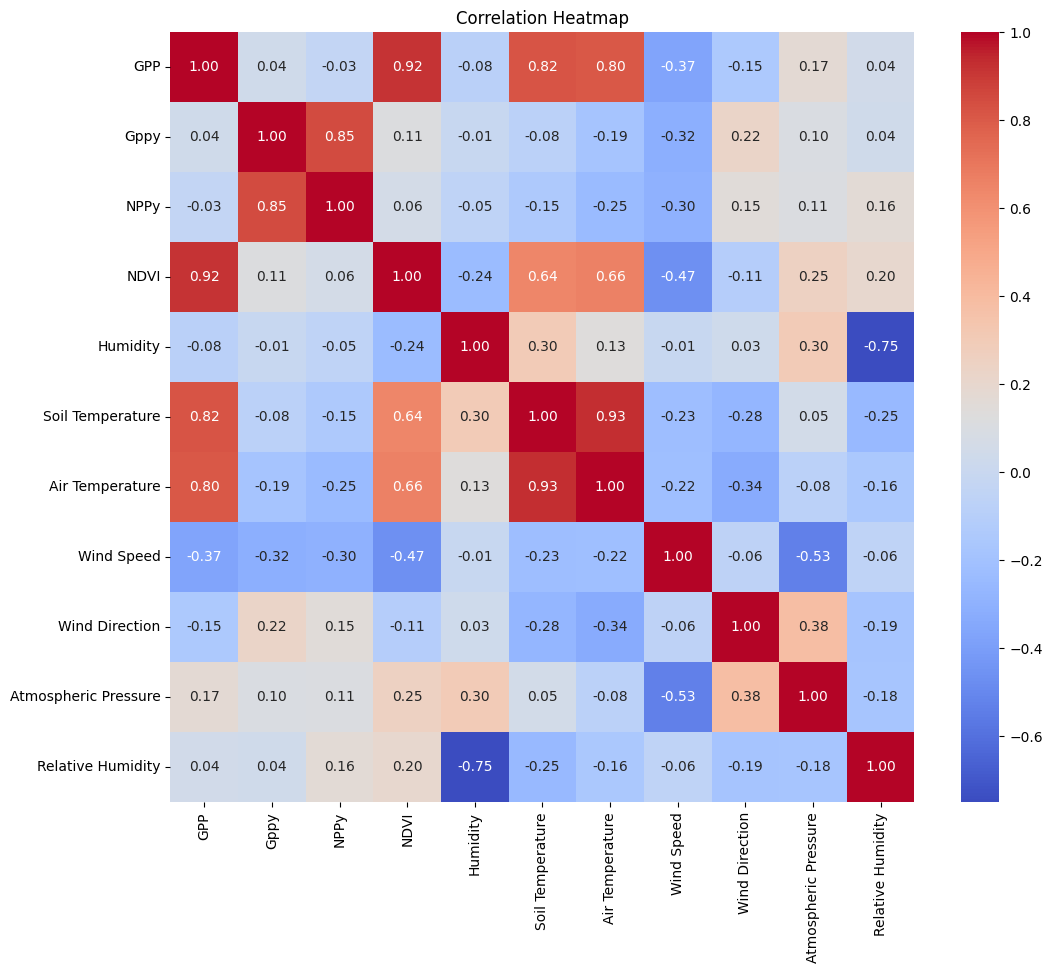

In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['GPP','Gppy', 'NPPy', 'NDVI', 'Humidity','Soil Temperature','Air Temperature'
                             ,'Wind Speed','Wind Direction','Atmospheric Pressure','Relative Humidity']

# Calculate the correlation matrix
correlation_matrix = final_data[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Find pairs of features with correlation greater than 0.85
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.80:
      print(f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have a correlation of {correlation_matrix.iloc[i, j]:.2f}')

GPP and NDVI have a correlation of 0.92
GPP and Soil Temperature have a correlation of 0.82
GPP and Air Temperature have a correlation of 0.80
Gppy and NPPy have a correlation of 0.85
Soil Temperature and Air Temperature have a correlation of 0.93


Since pairs such as (Gppy, Nppy) and (Soil Temperature, Air Temperature) have a high correlation we will drop Gppy and Air temperature.

In [ ]:
final_data.drop(columns=['Gppy','Air Temperature'], inplace= True)

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,NPPy,Npp,Humidity,Soil Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity
0,2015-03-06,41.162468,-96.475962,"{""type"":""Point"",""coordinates"":[-96.47596232670...",0.0138,0.156956,0.8330,0.007012,7.992308,3.654615,3.450769,222.846154,97.943077,66.7
1,2015-03-06,41.162468,-96.475693,"{""type"":""Point"",""coordinates"":[-96.47569283212...",0.0131,0.149560,0.8297,0.006663,7.992308,3.654615,3.450769,222.846154,97.943077,66.7
2,2015-03-06,41.162468,-96.475423,"{""type"":""Point"",""coordinates"":[-96.47542333753...",0.0128,0.157748,0.8208,0.006526,7.992308,3.654615,3.450769,222.846154,97.943077,66.7
3,2015-03-06,41.162468,-96.475154,"{""type"":""Point"",""coordinates"":[-96.47515384295...",0.0125,0.147336,0.8143,0.006418,7.992308,3.654615,3.450769,222.846154,97.943077,66.7
4,2015-03-06,41.162468,-96.474884,"{""type"":""Point"",""coordinates"":[-96.47488434836...",0.0130,0.147336,0.8140,0.006794,7.992308,3.654615,3.450769,222.846154,97.943077,66.7


In [ ]:
final_data.shape

(18109, 14)

In [ ]:
final_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m/Final_merged_data.csv', index=False)